In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from sklearn.metrics import classification_report


In [5]:
from sklearn.model_selection import train_test_split


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [8]:
import matplotlib.pyplot as plt


In [9]:
from sklearn.metrics import confusion_matrix


In [10]:
import seaborn as sns

In [11]:
from tensorflow import keras


In [12]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
df=pd.read_csv("train.txt",sep=";",names=['Description','Emotion'])


In [15]:
df

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [16]:
df['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [17]:
df['Emotion']=df['Emotion'].replace({"joy":0,"sadness":1,"anger":2,"fear":3,"love":4,"surprise":5})

In [18]:
df.sample(10)

,Description,Emotion
14568,i spontaneously come up with a new tune or whe...,0
15415,i am feeling rather triumphant that i decided ...,0
2231,i truly feel i am irate,2
15644,i have been feeling i find myself becoming les...,0
2776,i do want to feel loved and cherished by someone,4
13201,i am feeling quite disorganised and distracted...,2
12995,i went down superdrug it was usually make up o...,0
12808,i feel safe secure and protected when im in my...,0
14004,i think he is the next best because i see a lo...,0
9377,i feel her all around me when i am in hollywoo...,4


In [19]:
X_train,X_test,y_train,y_test = train_test_split(df.Description,df.Emotion,test_size=0.2)

In [20]:
max_words = 1000  # Maximum number of words to consider in vocabulary
tokenizer = Tokenizer(num_words=max_words)


In [21]:
tokenizer

In [22]:
tokenizer.fit_on_texts(X_train)


In [23]:
X_train_seq = tokenizer.texts_to_sequences(X_train)

In [24]:
X_train_seq

[[1,
  225,
  112,
  355,
  1,
  2,
  233,
  459,
  58,
  839,
  3,
  10,
  21,
  1,
  63,
  38,
  164,
  16,
  22,
  759],
 [1,
  2,
  117,
  21,
  136,
  9,
  5,
  305,
  208,
  76,
  910,
  8,
  79,
  64,
  27,
  84,
  460,
  185,
  16,
  37,
  91,
  6,
  360,
  179,
  209,
  934],
 [1, 11, 5, 323, 5, 239, 5, 296, 9, 15, 31, 5, 36, 61, 2, 8, 12, 64, 27, 722],
 [1,
  70,
  132,
  83,
  12,
  16,
  445,
  91,
  6,
  599,
  600,
  11,
  5,
  175,
  7,
  494,
  3,
  155,
  145,
  17,
  166,
  18,
  1,
  2,
  378,
  33,
  15,
  548,
  29,
  10,
  29,
  5,
  35,
  96],
 [1,
  472,
  4,
  20,
  911,
  4,
  226,
  5,
  208,
  24,
  6,
  54,
  80,
  9,
  6,
  14,
  1,
  20,
  47,
  548,
  135,
  7,
  549,
  35,
  96],
 [1,
  2,
  8,
  5,
  935,
  31,
  97,
  672,
  17,
  539,
  429,
  3,
  108,
  1,
  64,
  296,
  4,
  147,
  17,
  461,
  839,
  10,
  3,
  11,
  5,
  408],
 [1, 85, 4, 960, 32, 6, 54, 3, 33, 1, 95, 7, 281, 673, 6, 9, 3, 18],
 [1, 118, 55, 4, 107, 29, 5, 1, 2, 8, 1, 23, 118, 6

In [25]:
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [26]:
X_test_seq

[[1, 106, 3, 7, 45, 395, 24, 53, 54, 1, 420],
 [1,
  85,
  864,
  179,
  1,
  32,
  2,
  14,
  3,
  33,
  1,
  55,
  6,
  9,
  1,
  85,
  5,
  3,
  35,
  5,
  8,
  184,
  24,
  66],
 [1, 146, 46, 51, 522, 152, 4, 5, 3, 1, 2, 13, 229, 1, 221, 39, 24, 515, 8],
 [1,
  8,
  64,
  171,
  136,
  3,
  11,
  12,
  18,
  12,
  610,
  6,
  179,
  917,
  9,
  29,
  52,
  21,
  29,
  133,
  119,
  57,
  3,
  116,
  83,
  253,
  31,
  376,
  2,
  392,
  9,
  983,
  18,
  1,
  51,
  12,
  64],
 [1,
  267,
  158,
  61,
  43,
  384,
  58,
  3,
  160,
  61,
  2,
  5,
  89,
  61,
  2,
  3,
  1,
  8,
  61,
  20,
  5,
  4,
  123,
  52,
  61,
  321,
  592,
  456,
  34,
  12,
  21],
 [1, 20, 4, 508, 244, 31, 5, 114, 22, 891, 42, 2, 100, 255, 12, 2, 212],
 [1, 2, 173, 121, 10, 936],
 [1,
  8,
  12,
  924,
  17,
  6,
  313,
  7,
  9,
  4,
  6,
  242,
  291,
  6,
  700,
  6,
  190,
  922,
  6,
  8,
  354,
  7,
  8,
  90,
  11,
  10,
  77,
  28,
  6,
  569,
  31,
  166,
  434],
 [1, 2, 40, 27, 29, 5, 510],
 [1,

In [27]:
# Padding 
max_sequence_length = 100

In [28]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)

In [29]:
X_train_pad

array([[  0,   0,   0, ...,  16,  22, 759],
       [  0,   0,   0, ..., 179, 209, 934],
       [  0,   0,   0, ...,  64,  27, 722],
       ...,
       [  0,   0,   0, ...,   2, 467, 183],
       [  0,   0,   0, ...,  11,   5, 389],
       [  0,   0,   0, ...,  81,   4, 203]])

In [30]:
X_train_pad.shape

(12800, 100)

In [31]:
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [32]:
X_test_pad

array([[  0,   0,   0, ...,  54,   1, 420],
       [  0,   0,   0, ..., 184,  24,  66],
       [  0,   0,   0, ...,  24, 515,   8],
       ...,
       [  0,   0,   0, ...,   1, 225,  12],
       [  0,   0,   0, ...,   1,  23, 471],
       [  0,   0,   0, ...,  15,  31,   5]])

In [33]:
X_test_pad.shape

(3200, 100)

In [34]:

# Model Construction
model = keras.Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(6, activation='softmax'))  # 6 output classes
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [35]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [36]:
# Model Fit
epochs = 20
batch_size = 64
history = model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_pad, y_test), callbacks=[early_stop])

Epoch 1/20
200/200 [==============================] - 22s 107ms/step - loss: 1.4108 - accuracy: 0.4512 - val_loss: 0.8915 - val_accuracy: 0.6800
Epoch 2/20
200/200 [==============================] - 23s 117ms/step - loss: 0.5775 - accuracy: 0.8103 - val_loss: 0.4586 - val_accuracy: 0.8484
Epoch 3/20
200/200 [==============================] - 24s 119ms/step - loss: 0.3420 - accuracy: 0.8802 - val_loss: 0.4046 - val_accuracy: 0.8534
Epoch 4/20
200/200 [==============================] - 24s 119ms/step - loss: 0.2851 - accuracy: 0.8956 - val_loss: 0.3714 - val_accuracy: 0.8641
Epoch 5/20
200/200 [==============================] - 23s 115ms/step - loss: 0.2443 - accuracy: 0.9055 - val_loss: 0.3530 - val_accuracy: 0.8675
Epoch 6/20
200/200 [==============================] - 24s 120ms/step - loss: 0.2183 - accuracy: 0.9159 - val_loss: 0.3765 - val_accuracy: 0.8650
Epoch 7/20
200/200 [==============================] - 24s 121ms/step - loss: 0.2110 - accuracy: 0.9175 - val_loss: 0.3740 - val_ac

In [37]:
# Model Evaluation
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

100/100 [==============================] - 2s 16ms/step - loss: 0.3740 - accuracy: 0.8697
Loss: 0.3740
Accuracy: 0.8697


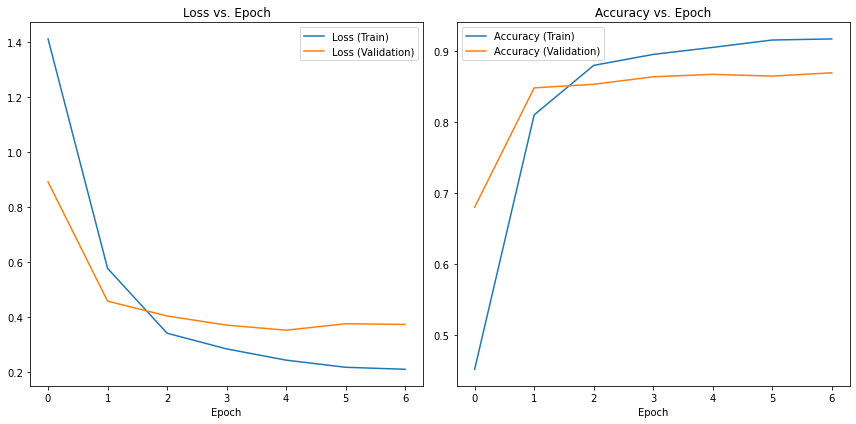

In [38]:

# Extract the data from the history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Loss (Train)')
plt.plot(val_loss, label='Loss (Validation)')
plt.legend()
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')

plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Accuracy (Train)')
plt.plot(val_accuracy, label='Accuracy (Validation)')
plt.legend()
plt.xlabel('Epoch')
plt.title('Accuracy vs. Epoch')

plt.tight_layout()
plt.show()


In [39]:
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

100/100 [==============================] - 1s 12ms/step


In [40]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1097
           1       0.93      0.92      0.92       922
           2       0.78      0.85      0.82       396
           3       0.81      0.79      0.80       410
           4       0.77      0.84      0.80       255
           5       0.79      0.72      0.75       120

    accuracy                           0.87      3200
   macro avg       0.83      0.83      0.83      3200
weighted avg       0.87      0.87      0.87      3200



Text(0.5, 1.0, 'Confusion Matrix')

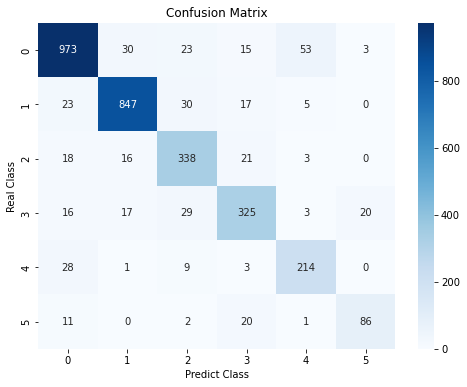

In [41]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predict Class')
plt.ylabel('Real Class')
plt.title('Confusion Matrix')